<a href="https://colab.research.google.com/github/Poorna-20/FML/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/Mall_Customers.csv")
print(df.head())
print(df.shape)

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)


In [ ]:
# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df_scale = pd.DataFrame(scaled_features, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(df_scale.head())

   Annual Income (k$)  Spending Score (1-100)
0            0.000000                0.387755
1            0.000000                0.816327
2            0.008197                0.051020
3            0.008197                0.775510
4            0.016393                0.397959


In [ ]:
# Perform K-Means clustering
k = 2
km = KMeans(n_clusters=k)
y_predicted = km.fit_predict(df_scale)
print(y_predicted)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Get the cluster centers
cluster_centers = km.cluster_centers_
print(cluster_centers)


[[0.37861485 0.73950929]
 [0.36929553 0.31163817]]


In [ ]:
# Assign cluster labels to the original dataframe
df['Clusters'] = km.labels_

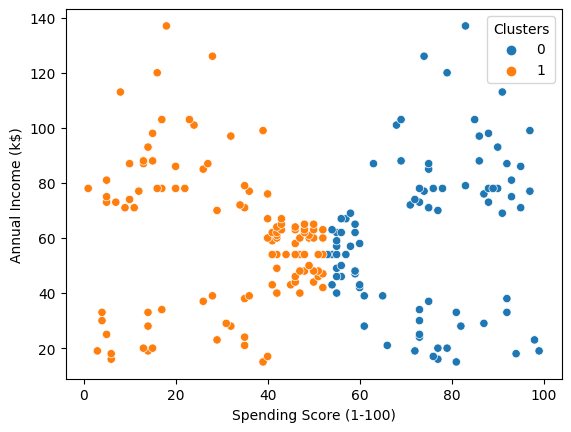

In [ ]:
# Visualize the clusters
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue='Clusters', data=df)
plt.show()

In [ ]:
# Elbow method to determine optimal number of clusters
K = range(2, 12)
wss = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

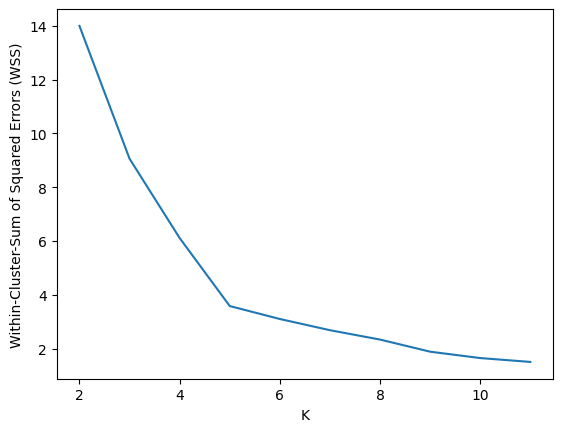

In [ ]:
# Plot the within-cluster sum of squared errors (WSS) for different K
plt.plot(K, wss)
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.show()

In [ ]:
# Perform K-Means clustering with the chosen number of clusters
k_chosen = 5
km_chosen = KMeans(n_clusters=k_chosen)
y_predicted_chosen = km_chosen.fit_predict(df_scale[['Annual Income (k$)', 'Spending Score (1-100)']])
print(y_predicted_chosen)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 2 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 0 4 2 4 0 4 0 4 2 4 0 4 0 4 0 4 0 4 2 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Assign cluster labels to the original dataframe
df['Clusters'] = km_chosen.labels_


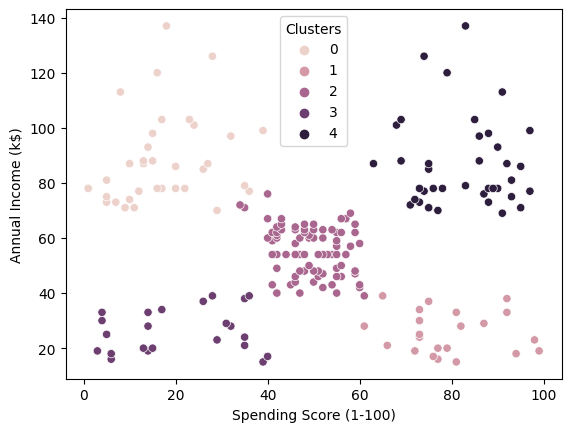

In [ ]:
# Visualize the clusters with the chosen number of clusters
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue='Clusters', data=df)
plt.show()